In [19]:
import torch
from torch import nn ## for neural net
import matplotlib as plt ## for plotting

torch.__version__

# create known params
weight = 0.7
bias = 0.3

# create data 

start = 0 
end = 1

step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias


train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:] 

len(X_train), len(y_train), len(X_test), len(y_test)

## X - data
## y is - labels




(40, 40, 10, 10)

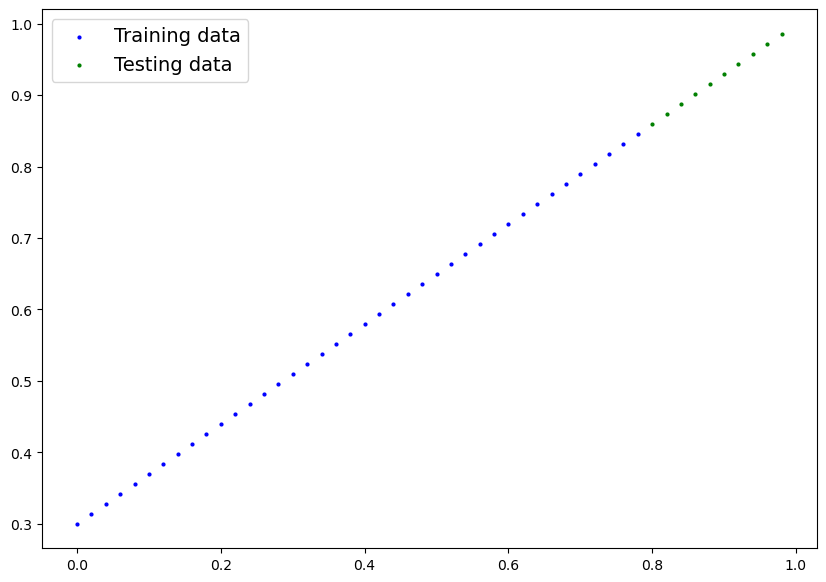

In [20]:
import matplotlib.pyplot as plt

def plotting_predictions(train_data = X_train, 
                         train_labels = y_train,
                         test_data = X_test,
                         test_labels = y_test,
                         predictions = None):
    
    plt.figure(figsize = (10,7))

      # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

plotting_predictions()



In [21]:
class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float, requires_grad=True))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)
        

torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0.state_dict()

with torch.inference_mode():
    y_preds = model_0(X_test)

In [22]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


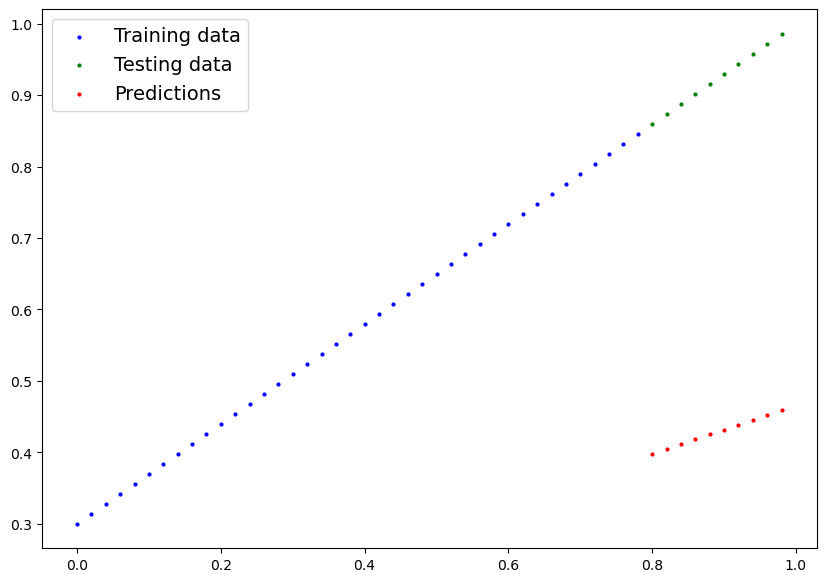

In [23]:
plotting_predictions(predictions=y_preds)

In [24]:
loss_fn = nn.L1Loss() # calculating mean absolute error

optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.01 ) # how much should the model should adjust the parameters in each step. 

In [25]:
torch.manual_seed(42)

epochs = 200

train_loss_val = []
test_loss_val = []
epoch_count = []

for epoch in range(epochs):
    model_0.train
    y_pred = model_0(X_train)
    loss  = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval

    with torch.inference_mode():
        test_pred = model_0(X_test)

        test_loss = loss_fn(test_pred,  y_test.type(torch.float))

      # Print out what's happening
        if epoch % 10 == 0:
                epoch_count.append(epoch)
                train_loss_val.append(loss.detach().numpy())
                test_loss_val.append(test_loss.detach().numpy())
                print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
            
        
        


Epoch: 0 | MAE Train Loss: 0.31288135051727295 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713389158249 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.2172965705394745 
Epoch: 30 | MAE Train Loss: 0.053148530423641205 | MAE Test Loss: 0.14464019238948822 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953748226166 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633813381195 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937722325325 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.027887403964996338 | MAE Test Loss: 0.06473556160926819 
Epoch: 100 | MAE Train Loss: 0.024458955973386765 | MAE Test Loss: 0.056463055312633514 
Epoch: 110 | MAE Train Loss: 0.021020209416747093 | MA

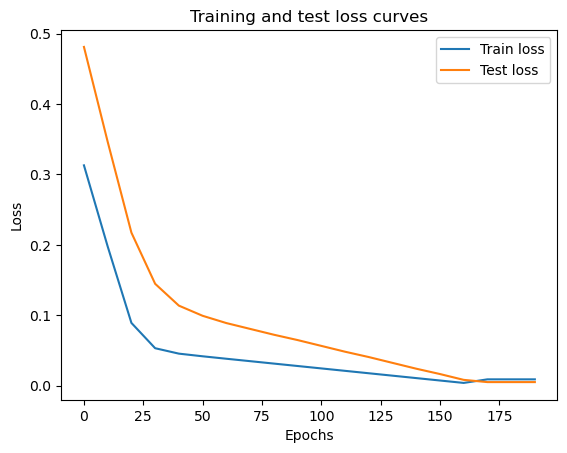

In [26]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_val, label="Train loss")
plt.plot(epoch_count, test_loss_val, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [16]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.6990]), 'bias': tensor([0.3093])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [29]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

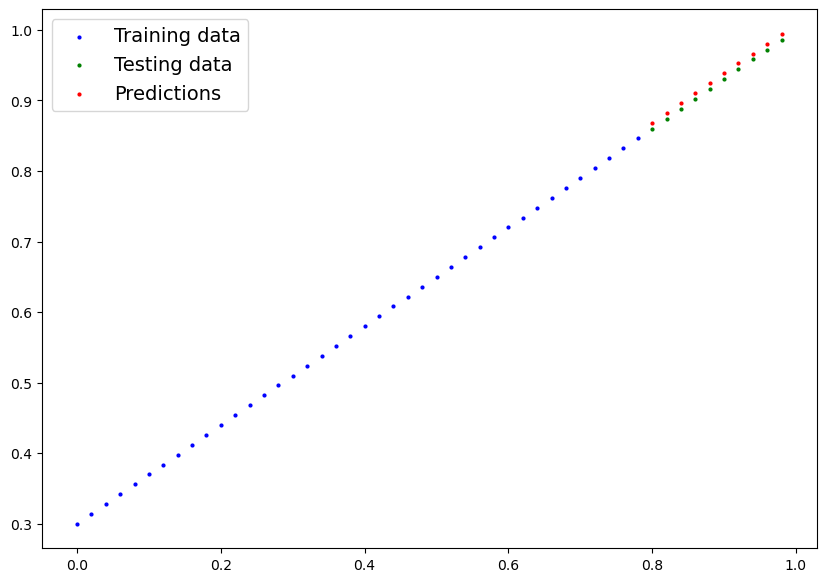

In [30]:
plotting_predictions(predictions=y_preds)